In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = np.load("./data/sdf.npz")
sdf = data['sdf'].squeeze()
gradient = data['sdf_gradient'].squeeze()
N = gradient.shape[0]

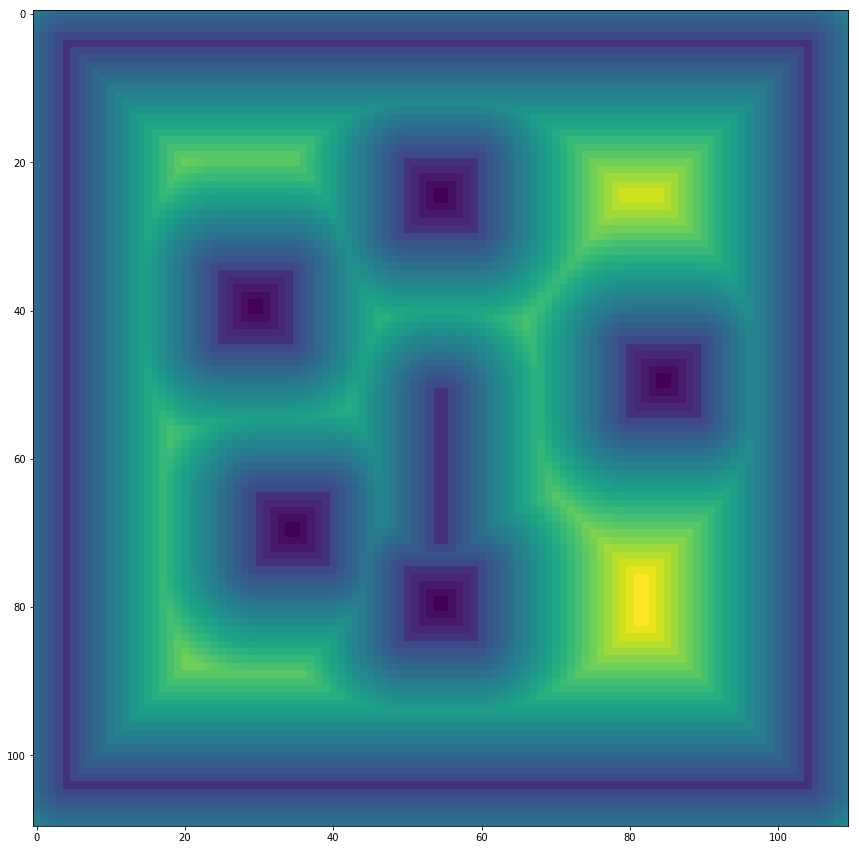

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(sdf)

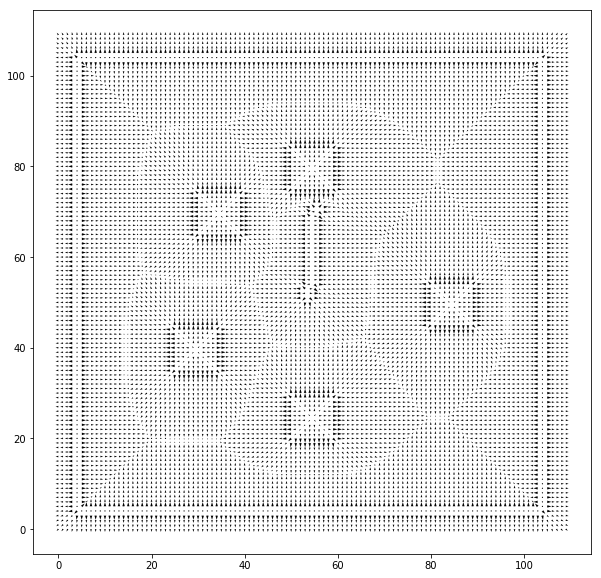

In [11]:
t = np.arange(N)
plt.figure(figsize=(15,15))
plt.quiver(t, t, gradient[:,:,1], gradient[:,:,0])